In [35]:
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import sent_tokenize, word_tokenize
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [5]:
newsData=fetch_20newsgroups(subset='all', remove=('headers', 'footers'))

In [6]:
newsData20=newsData["data"]
type(newsData20)

list

In [17]:
# 코프스 다운받기
#nltk.download('all', quiet=True)

In [13]:
# 불용어(stopword) 제거
stopwords=nltk.corpus.stopwords.words('english')

In [18]:
#print(f'stopwords => {len(stopwords)}개\n{stopwords}')

In [20]:
words=set()

for news in newsData20:
    _news=word_tokenize(news)
    
    for n in _news:
        if n not in stopwords:
            words.add(n)

In [21]:
len(words)

239988

In [30]:
words

{'PCW',
 '1:9',
 '500SEL',
 'NIDR',
 '3P\\17-S',
 'U-34LQVDU-',
 'XKeysymDB-file',
 'MRS.',
 'cellular-automaton',
 'F=G',
 'U.QM2',
 'Blocks',
 'DSZZ9',
 'Bruins-Buffalo',
 'XW=W',
 '1993Apr16.162950.25849',
 'float',
 'Psychological',
 'PHOTOGRAPHY',
 'aspidisk.sys',
 'ShG',
 '2/3T',
 '1993Apr19.223026.10137',
 'krenz',
 'wrestled',
 'MBXN+',
 'Terminals',
 '27=W24F',
 'proof-texting',
 '100-120',
 'NFO',
 'Z+VDZACHZRFF',
 "MQV6WA'6Q",
 'harebell.egr.uh.edu',
 'bmerh327.BNR.CA',
 'arbitrary',
 'WOC2',
 'suggestionas',
 'firstmost',
 'MI:6EI:6E1',
 'Paraclete',
 '1993May14.180729.28073',
 '+PS^G',
 'makedepend',
 '/pub/internet-info/',
 '11000010',
 '4UQ',
 'nation-states',
 '-WXL',
 'W=W=A4',
 'oldpublic/fly',
 'IM_',
 'WP-1',
 'alt-group',
 'omelette',
 'SP\\144\\17-',
 'contami-',
 'MPV',
 'Ismailov',
 '9-',
 'CASES',
 'merkelbd',
 '1993Apr21.001707.9999',
 '-do',
 'M8P/R9US:01AU85CM=HX',
 'Albrecht',
 '1-800-541-2598',
 'YKN^QW',
 'PX5Q',
 'gemfibrozil',
 'adultry',
 'J3F',
 'char

In [33]:
wtokens=set()

for news in newsData20:
    for sent in sent_tokenize(news):
        ws=word_tokenize(sent)
        
        for n in ws:
            if n not in stopwords:
                wtokens.add(n)

In [34]:
len(wtokens)

239882

In [36]:
tfVector=TfidfVectorizer()
tfVector.fit(newsData20)

TfidfVectorizer()

In [37]:
result=tfVector.transform(newsData20)
result.shape

(18846, 152843)

In [7]:
text_to_word_sequence(newsData20[0])

['i',
 'am',
 'sure',
 'some',
 'bashers',
 'of',
 'pens',
 'fans',
 'are',
 'pretty',
 'confused',
 'about',
 'the',
 'lack',
 'of',
 'any',
 'kind',
 'of',
 'posts',
 'about',
 'the',
 'recent',
 'pens',
 'massacre',
 'of',
 'the',
 'devils',
 'actually',
 'i',
 'am',
 'bit',
 'puzzled',
 'too',
 'and',
 'a',
 'bit',
 'relieved',
 'however',
 'i',
 'am',
 'going',
 'to',
 'put',
 'an',
 'end',
 'to',
 'non',
 "pittsburghers'",
 'relief',
 'with',
 'a',
 'bit',
 'of',
 'praise',
 'for',
 'the',
 'pens',
 'man',
 'they',
 'are',
 'killing',
 'those',
 'devils',
 'worse',
 'than',
 'i',
 'thought',
 'jagr',
 'just',
 'showed',
 'you',
 'why',
 'he',
 'is',
 'much',
 'better',
 'than',
 'his',
 'regular',
 'season',
 'stats',
 'he',
 'is',
 'also',
 'a',
 'lot',
 'fo',
 'fun',
 'to',
 'watch',
 'in',
 'the',
 'playoffs',
 'bowman',
 'should',
 'let',
 'jagr',
 'have',
 'a',
 'lot',
 'of',
 'fun',
 'in',
 'the',
 'next',
 'couple',
 'of',
 'games',
 'since',
 'the',
 'pens',
 'are',
 'goi

In [38]:
myToken=Tokenizer()

In [39]:
# 리스트 형태일 땐 fit_on_texts 쓰는 것 같음
# 단어사전(voca) 생성
myToken.fit_on_texts(words)

In [42]:
# 생성된 단어사전 => 빈도가 높은 순
#print(myToken.word_index)

In [41]:
# 생성된 단어사전의 개수
print(f'word_count : {myToken.word_counts}')

word_count : OrderedDict([('pcw', 2), ('1', 3244), ('9', 1370), ('500sel', 1), ('nidr', 1), ('3p', 26), ('17', 389), ('s', 1578), ('u', 940), ('34lqvdu', 1), ('xkeysymdb', 3), ('file', 51), ('mrs', 8), ('cellular', 5), ('automaton', 3), ('f', 618), ('g', 821), ('qm2', 2), ('blocks', 2), ('dszz9', 1), ('bruins', 8), ('buffalo', 19), ('xw', 17), ('w', 2233), ('1993apr16', 143), ('162950', 1), ('25849', 1), ('float', 2), ('psychological', 2), ('photography', 4), ('aspidisk', 1), ('sys', 101), ('shg', 2), ('2', 2180), ('3t', 66), ('1993apr19', 156), ('223026', 1), ('10137', 1), ('krenz', 2), ('wrestled', 1), ('mbxn', 20), ('terminals', 7), ('27', 201), ('w24f', 3), ('proof', 20), ('texting', 1), ('100', 126), ('120', 34), ('nfo', 2), ('z', 1268), ('vdzachzrff', 1), ("mqv6wa'6q", 1), ('harebell', 1), ('egr', 8), ('uh', 41), ('edu', 2395), ('bmerh327', 1), ('bnr', 21), ('ca', 343), ('arbitrary', 5), ('woc2', 1), ('suggestionas', 1), ('firstmost', 1), ('mi', 63), ('6ei', 215), ('6e1', 8), ('p

In [16]:
myToken.filters

'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

In [ ]:
myToken.

In [43]:
print(len(myToken.word_counts))

152789


In [ ]:
# 뭘.. 하고 있는 거지...

In [45]:
# 텍스트 => 수치화 (단어사전 사용해서)
seq_news=myToken.texts_to_sequences(newsData20)

In [46]:
len(seq_news)

18846

In [51]:
seq_news_len=np.array([len(news) for news in seq_news])
np.mean(seq_news_len), np.median(seq_news_len)

(263.4825427146344, 138.5)

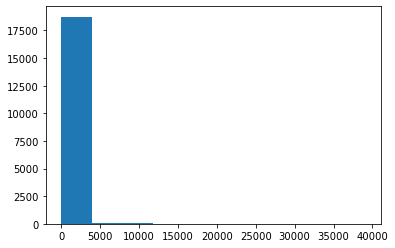

In [50]:
plt.hist(seq_news_len)
plt.show()

In [52]:
# [3] 가변 길이 => 고정 길이 : padding
from tensorflow.keras.utils import pad_sequences, to_categorical

In [53]:
len(seq_news)

18846

In [55]:
timestep_size=100

seq_pad_news=pad_sequences(seq_news, timestep_size)

In [56]:
seq_pad_news.shape

(18846, 100)

In [61]:
myToken.word_index

{'1': 1,
 'edu': 2,
 'w': 3,
 '0': 4,
 '2': 5,
 'm': 6,
 '3': 7,
 'com': 8,
 '4': 9,
 's': 10,
 '8': 11,
 'x': 12,
 '6': 13,
 '9': 14,
 '5': 15,
 'c': 16,
 '7': 17,
 'z': 18,
 't': 19,
 'i': 20,
 "'": 21,
 'b': 22,
 'a': 23,
 'p': 24,
 'v': 25,
 'u': 26,
 'o': 27,
 'r': 28,
 'h': 29,
 'l': 30,
 'd': 31,
 'g': 32,
 'n': 33,
 'y': 34,
 'q': 35,
 'e': 36,
 'j': 37,
 'non': 38,
 'f': 39,
 'k': 40,
 'g9v': 41,
 '10': 42,
 'pub': 43,
 'cx': 44,
 '11': 45,
 '12': 46,
 '14': 47,
 '34u': 48,
 '00': 49,
 '16': 50,
 '17': 51,
 '15': 52,
 'cs': 53,
 '20': 54,
 '13': 55,
 '75u': 56,
 '1993': 57,
 'ca': 58,
 '000': 59,
 '18': 60,
 '19': 61,
 'ac': 62,
 '30': 63,
 '21': 64,
 'tar': 65,
 '25': 66,
 '23': 67,
 'gov': 68,
 '34': 69,
 'uk': 70,
 '800': 71,
 '50': 72,
 '24': 73,
 '22': 74,
 '2tm': 75,
 'to': 76,
 'au': 77,
 'chz': 78,
 "'1t": 79,
 '1993apr20': 80,
 '6ei': 81,
 '93': 82,
 '02': 83,
 '92': 84,
 'anti': 85,
 're': 86,
 'scx': 87,
 '28': 88,
 'in': 89,
 '27': 90,
 '1993apr15': 91,
 '01': 92,


In [59]:
type(myToken.word_counts), myToken.word_counts.values()

(collections.OrderedDict,
 odict_values([2, 3244, 1370, 1, 1, 26, 389, 1578, 940, 1, 3, 51, 8, 5, 3, 618, 821, 2, 2, 1, 8, 19, 17, 2233, 143, 1, 1, 2, 2, 4, 1, 101, 2, 2180, 66, 156, 1, 1, 2, 1, 20, 7, 201, 3, 20, 1, 126, 34, 2, 1268, 1, 1, 1, 8, 41, 2395, 1, 21, 343, 5, 1, 1, 1, 63, 215, 8, 1, 10, 1, 1, 78, 3, 544, 34, 104, 1, 2, 10, 8, 1, 23, 1, 19, 30, 20, 161, 21, 1, 73, 58, 1, 2, 1, 5, 1, 195, 1, 2, 64, 1, 1, 1, 16, 1, 237, 7, 1, 1, 16, 1, 1, 1, 3, 9, 5, 4, 1, 1925, 3, 1, 5, 1581, 9, 7, 1, 700, 896, 20, 2, 2, 1, 1, 1, 45, 6, 9, 61, 581, 1, 1, 3, 10, 2, 1, 1, 8, 1, 1, 2, 217, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 11, 1, 1, 2, 1, 6, 1, 4, 1, 5, 4, 2, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 3, 2, 2231, 1, 1, 1260, 2, 2, 1, 1, 1, 100, 2, 1, 16, 1, 67, 1, 1, 1474, 7, 1, 1, 8, 43, 256, 459, 257, 1, 4, 1, 3, 1, 4, 1377, 1, 2, 1, 22, 1066, 36, 1, 1, 63, 19, 1, 1, 1, 10, 2, 20, 98, 1709, 2, 10, 2, 8, 18, 24, 16, 1, 4, 6, 1, 1, 2, 1, 14, 822, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 127, 1, 4, 1, 965,

In [60]:
sorted(myToken.word_counts.items(), key=lambda x: x[1], reverse=True)

[('1', 3244),
 ('edu', 2395),
 ('w', 2233),
 ('0', 2231),
 ('2', 2180),
 ('m', 1925),
 ('3', 1709),
 ('com', 1645),
 ('4', 1581),
 ('s', 1578),
 ('8', 1569),
 ('x', 1474),
 ('6', 1377),
 ('9', 1370),
 ('5', 1369),
 ('c', 1328),
 ('7', 1303),
 ('z', 1268),
 ('t', 1260),
 ('i', 1221),
 ("'", 1143),
 ('b', 1102),
 ('a', 1066),
 ('p', 966),
 ('v', 965),
 ('u', 940),
 ('o', 919),
 ('r', 903),
 ('h', 896),
 ('l', 865),
 ('d', 822),
 ('g', 821),
 ('n', 792),
 ('y', 727),
 ('q', 700),
 ('e', 629),
 ('j', 620),
 ('non', 620),
 ('f', 618),
 ('k', 607),
 ('g9v', 583),
 ('10', 581),
 ('pub', 544),
 ('cx', 467),
 ('11', 459),
 ('12', 452),
 ('14', 418),
 ('34u', 396),
 ('00', 392),
 ('16', 391),
 ('17', 389),
 ('15', 381),
 ('cs', 363),
 ('20', 358),
 ('13', 358),
 ('75u', 346),
 ('1993', 344),
 ('ca', 343),
 ('000', 317),
 ('18', 297),
 ('19', 287),
 ('ac', 260),
 ('30', 257),
 ('21', 257),
 ('tar', 256),
 ('25', 253),
 ('23', 249),
 ('gov', 247),
 ('34', 243),
 ('uk', 241),
 ('800', 237),
 ('50',

In [62]:
myToken.word_counts['ax']

37

## 모델